<a href="https://colab.research.google.com/github/pizybaker/menosense_1/blob/main/MenoSense_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Load and prepare dataset

In [2]:
file_path = "https://raw.githubusercontent.com/pizybaker/menosense/refs/heads/main/30501-0001-Data.tsv?token=GHSAT0AAAAAAC6OXF767BHRMAPX53DUCLAYZ6J3IRA"
df = pd.read_csv(file_path, sep='\t')

# Selecting relevant columns
selected_columns = [
    "AGE5", "LMPDAY5", "PRGNANT5", "BMI5", "SMOKERE5", "ALCHL245", "WORKLOA5",
    "SLEEPQL5", "DEPRESS5", "ENERGY5", "STRSSJO5", "HOTFLAS5", "NITESWE5",
    "IRRITAB5", "FEELBLU5", "MOODCHG5", "HARTRAC5", "MENOSYM5", "STATUS5"
]

df = df[selected_columns]

# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

data preprocessing

In [3]:
# Split into features (X) and target (STATUS5 for classification)
X = df.drop(columns=["STATUS5", "AGE5"])
y_status = df["STATUS5"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Random Oversampling for minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y_status)

model training and eval


Menopause Status Classifier Accuracy: 97.78%
F1 Score: 0.98


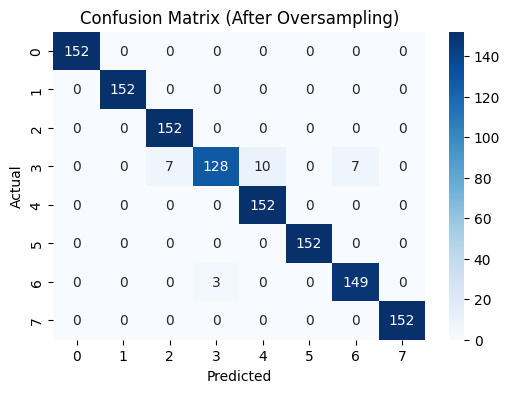

In [4]:
# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Train classifier to predict STATUS5
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Predict menopause status
y_pred_status = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_status)
print(f"Menopause Status Classifier Accuracy: {accuracy:.2%}")

# F1 Score
f1 = f1_score(y_test, y_pred_status, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix for Classification
conf_matrix = confusion_matrix(y_test, y_pred_status)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After Oversampling)')
plt.show()

Predict status and years until menopause

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


def predict_menopause_status():
    print("\nPlease provide the following information:")
    lmp_day = int(input("LMP Day (Day of the month of your last menstrual period, e.g., 15): "))
    ethnicity = int(input("Ethnicity (Select a number: 1-White, 2-Black, 3-Hispanic, 4-Asian, 5-Other): "))
    pregnancy_status = int(input("Pregnancy Status (1 for Not Pregnant, 2 for Pregnant): "))
    bmi = float(input("BMI (e.g., 22.5): "))
    smoking_status = int(input("Smoking Status (1 for Non-Smoker, 2 for Smoker): "))
    alcohol_consumption = int(input("Alcohol Consumption (1 for No, 2 for Yes): "))
    workload_stress = float(input("Workload Stress (Scale from 0 to 10): "))
    sleep_quality = float(input("Sleep Quality (Scale from 0 to 10): "))
    depression_level = float(input("Depression Level (Scale from 0 to 10): "))
    energy_level = float(input("Energy Level (Scale from 0 to 10): "))
    job_stress = float(input("Job Stress (Scale from 0 to 10): "))
    hot_flashes = int(input("Hot Flashes (1 for No, 2 for Yes): "))
    night_sweats = int(input("Night Sweats (1 for No, 2 for Yes): "))
    irritability = float(input("Irritability Level (Scale from 0 to 10): "))
    mood_changes = float(input("Mood Changes (Scale from 0 to 10): "))
    heart_palpitations = int(input("Heart Palpitations (1 for No, 2 for Yes): "))
    menopausal_symptoms = int(input("Menopausal Symptoms (1 for No, 2 for Yes): "))

    # Compiling all input features into a single array
    input_data = np.array([[
        lmp_day, ethnicity, pregnancy_status, bmi, smoking_status,
        alcohol_consumption, workload_stress, sleep_quality, depression_level,
        energy_level, job_stress, hot_flashes, night_sweats, irritability,
        mood_changes, heart_palpitations, menopausal_symptoms
    ]])

    input_scaled = scaler.transform(input_data)
    prediction = clf.predict(input_scaled)[0]

    if prediction == 1:
        print("\nPrediction: Menopausal.")
    else:
        predicted_years = clf.predict(input_scaled)[0]
        print("\nPrediction: Not Yet Menopausal.")
        print(f"Estimated Years Until Menopause: {predicted_years:.2f} years")

predict_menopause_status()



Please provide the following information:
LMP Day (Day of the month of your last menstrual period, e.g., 15): 15
Ethnicity (Select a number: 1-White, 2-Black, 3-Hispanic, 4-Asian, 5-Other): 4
Pregnancy Status (1 for Not Pregnant, 2 for Pregnant): 1
BMI (e.g., 22.5): 32
Smoking Status (1 for Non-Smoker, 2 for Smoker): 1
Alcohol Consumption (1 for No, 2 for Yes): 1
Workload Stress (Scale from 0 to 10): 7
Sleep Quality (Scale from 0 to 10): 8
Depression Level (Scale from 0 to 10): 7
Energy Level (Scale from 0 to 10): 8
Job Stress (Scale from 0 to 10): 5
Hot Flashes (1 for No, 2 for Yes): 2
Night Sweats (1 for No, 2 for Yes): 2
Irritability Level (Scale from 0 to 10): 4
Mood Changes (Scale from 0 to 10): 1
Heart Palpitations (1 for No, 2 for Yes): 2
Menopausal Symptoms (1 for No, 2 for Yes): 2

Prediction: Not Yet Menopausal.
Estimated Years Until Menopause: 2.00 years
